<a href="https://colab.research.google.com/github/ambaraftab/codealpha_tasks/blob/main/CreditScoringModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = ["status", "duration", "credit_history", "purpose", "credit_amount",
           "savings", "employment", "installment_rate", "personal_status",
           "other_parties", "residence_since", "property_magnitude", "age",
           "other_payment_plans", "housing", "existing_credits",
           "job", "num_dependents", "own_telephone", "foreign_worker", "class"]
df = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


In [ ]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["status", "credit_history", "purpose", "savings",
                    "employment", "personal_status", "other_parties",
                    "property_magnitude", "other_payment_plans", "housing",
                    "job", "own_telephone", "foreign_worker"]

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split target and features
X = df.drop('class', axis=1)
y = df['class']

# Convert target to binary (1 for good credit, 0 for bad)
y = y.apply(lambda x: 1 if x == 1 else 0)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {roc_auc}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7833333333333333
AUC-ROC: 0.7049003627950996
Confusion Matrix:
 [[ 46  45]
 [ 20 189]]


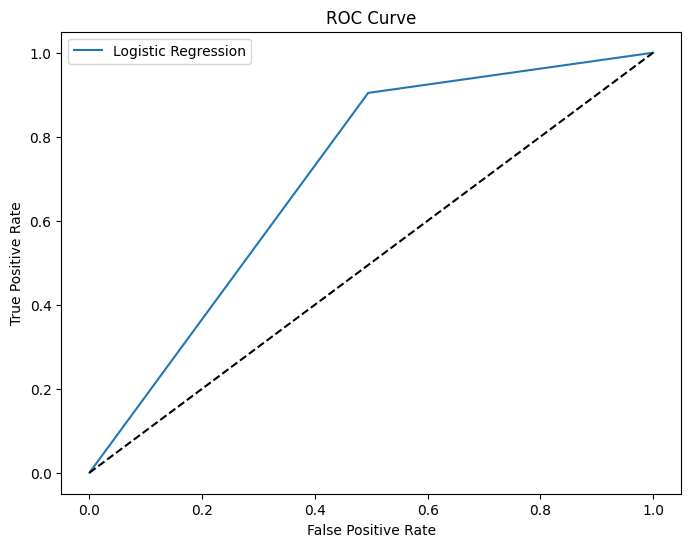

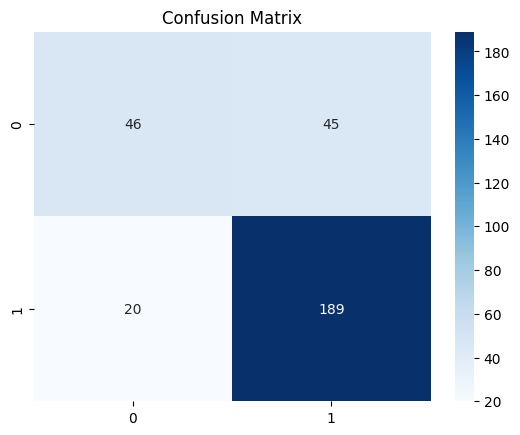

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_roc_auc = roc_auc_score(y_test, y_rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest AUC-ROC: {rf_roc_auc}")


Random Forest Accuracy: 0.75
Random Forest AUC-ROC: 0.6468531468531469
